In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Downloaded datasets from FRED

In [232]:
import pandas as pd

# Read the CSV files
cpi = pd.read_csv('cpi.csv')
job_growth = pd.read_csv('Jobgrowth.csv')
mortgage = pd.read_csv('mortgage.csv')
money_supply = pd.read_csv('msupply.csv')
population = pd.read_csv('population.csv')
unemployment_rate = pd.read_csv('unrate.csv')
price = pd.read_csv('price.csv')

In [233]:
# Display the first few rows of each dataset
print("CPI Dataset:")
print(cpi.head())

print("\nJob Growth Dataset:")
print(job_growth.head())

print("\nMortgage Dataset:")
print(mortgage.head())

print("\nMoney Supply Dataset:")
print(money_supply.head())

print("\nPopulation Dataset:")
print(population.head())

print("\nUnemployment Rate Dataset:")
print(unemployment_rate.head())

print("\nHouse Price Dataset:")
print(price.head())

CPI Dataset:
         DATE    CPI
0  2003-07-01  183.7
1  2003-08-01  184.5
2  2003-09-01  185.1
3  2003-10-01  184.9
4  2003-11-01  185.0

Job Growth Dataset:
         DATE  JOB GROWTH
0  2003-07-01         3.6
1  2003-08-01         3.6
2  2003-09-01         3.6
3  2003-10-01         3.5
4  2003-11-01         3.5

Mortgage Dataset:
         DATE  MORTGAGE
0  2003-07-01    5.6325
1  2003-08-01    6.2640
2  2003-09-01    6.1475
3  2003-10-01    5.9520
4  2003-11-01    5.9325

Money Supply Dataset:
         DATE  MONEY SUPPLY
0  2003-07-01           3.6
1  2003-08-01           3.5
2  2003-09-01           3.8
3  2003-10-01           3.8
4  2003-11-01           4.1

Population Dataset:
         DATE  POPUPLATION
0  2003-07-01     290726.0
1  2003-08-01     290974.0
2  2003-09-01     291222.0
3  2003-10-01     291463.0
4  2003-11-01     291677.0

Unemployment Rate Dataset:
         DATE  UNRATE
0  2003-07-01     6.2
1  2003-08-01     6.1
2  2003-09-01     6.1
3  2003-10-01     6.0
4  2003-1

In [234]:
import pandas as pd
import glob

# Getting a list of all CSV files in the current directory
csv_files = glob.glob('*.csv')

# Loop through each CSV file and display its null values
for file in csv_files:
    df = pd.read_csv(file)
    print(f"null values {file}")
    print(df.isnull().sum())  
    print("\n")  # Adding a line break between file null value count

null values cpi.csv
DATE    0
CPI     0
dtype: int64


null values jobgrowth.csv
DATE          0
JOB GROWTH    0
dtype: int64


null values mortgage.csv
DATE        0
MORTGAGE    0
dtype: int64


null values msupply.csv
DATE            0
MONEY SUPPLY    0
dtype: int64


null values population.csv
DATE           0
POPUPLATION    0
dtype: int64


null values price.csv
DATE     0
PRICE    0
dtype: int64


null values unrate.csv
DATE      0
UNRATE    0
dtype: int64




In [235]:
# Merge datasets based on the 'DATE' column
merged_data = pd.merge(cpi, job_growth, on='DATE', how='inner')
merged_data = pd.merge(merged_data, mortgage, on='DATE', how='inner')
merged_data = pd.merge(merged_data, money_supply, on='DATE', how='inner')
merged_data = pd.merge(merged_data, population, on='DATE', how='inner')
merged_data = pd.merge(merged_data, unemployment_rate, on='DATE', how='inner')
merged_data = pd.merge(merged_data, price, on='DATE', how='inner')
# Check the shape and sample of the combined dataset
print(merged_data.shape)
print(merged_data.head())


(241, 8)
         DATE    CPI  JOB GROWTH  MORTGAGE  MONEY SUPPLY  POPUPLATION  UNRATE  \
0  2003-07-01  183.7         3.6    5.6325           3.6     290726.0     6.2   
1  2003-08-01  184.5         3.6    6.2640           3.5     290974.0     6.1   
2  2003-09-01  185.1         3.6    6.1475           3.8     291222.0     6.1   
3  2003-10-01  184.9         3.5    5.9520           3.8     291463.0     6.0   
4  2003-11-01  185.0         3.5    5.9325           4.1     291677.0     5.8   

     PRICE  
0  133.777  
1  134.969  
2  136.294  
3  137.531  
4  138.794  


In [236]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 240
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          241 non-null    object 
 1   CPI           241 non-null    float64
 2   JOB GROWTH    241 non-null    float64
 3   MORTGAGE      241 non-null    float64
 4   MONEY SUPPLY  241 non-null    float64
 5   POPUPLATION   241 non-null    float64
 6   UNRATE        241 non-null    float64
 7   PRICE         241 non-null    float64
dtypes: float64(7), object(1)
memory usage: 16.9+ KB


In [237]:
merged_data.to_csv('D:excel/merged_data.csv', index=False)

In [238]:
price

,DATE,PRICE
0,2003-07-01,133.777
1,2003-08-01,134.969
2,2003-09-01,136.294
3,2003-10-01,137.531
4,2003-11-01,138.794
...,...,...
236,2023-03-01,298.637
237,2023-04-01,300.213
238,2023-05-01,302.566
239,2023-06-01,304.593


In [239]:

# Display summary statistics of numerical columns
merged_data.describe()


,CPI,JOB GROWTH,MORTGAGE,MONEY SUPPLY,POPUPLATION,UNRATE,PRICE
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,233.297261,3.126971,4.711035,6.236515,316020.917012,5.940249,185.401859
std,28.982511,0.896137,1.139193,1.936340,13499.502735,2.072377,45.082768
min,183.700000,1.600000,2.684000,3.300000,290726.000000,3.400000,133.777000
25%,212.709000,2.600000,3.802500,4.900000,304646.000000,4.400000,149.963000
50%,232.937000,3.200000,4.457500,5.600000,317156.000000,5.300000,174.792000
75%,251.214000,3.700000,5.820000,7.300000,328863.000000,7.300000,202.913000
max,304.348000,5.700000,6.900000,12.200000,335329.000000,14.700000,306.767000


In [240]:
# Check for missing values
missing_values = merged_data.isnull().sum()
print(missing_values)


DATE            0
CPI             0
JOB GROWTH      0
MORTGAGE        0
MONEY SUPPLY    0
POPUPLATION     0
UNRATE          0
PRICE           0
dtype: int64


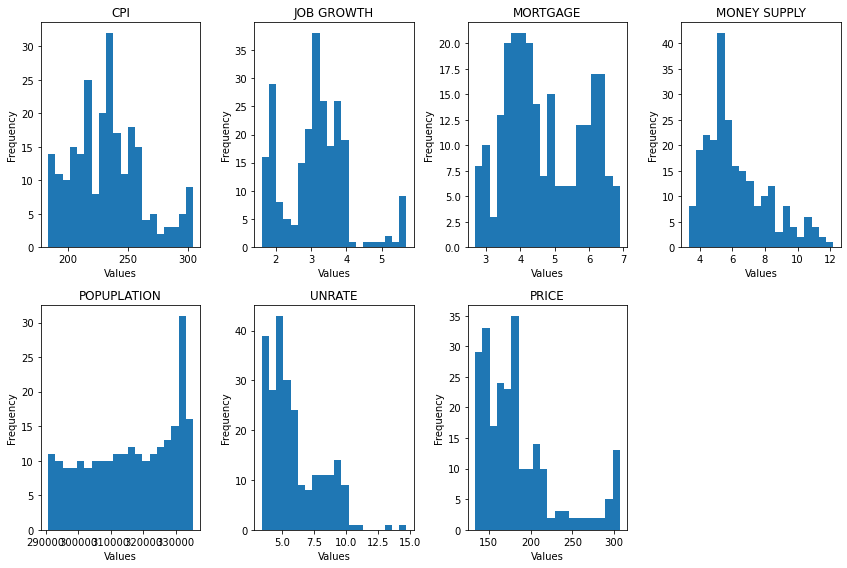

In [241]:
# Plot histograms for numerical columns
import matplotlib.pyplot as plt

numerical_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns) // 2 + 1, i)
    plt.hist(merged_data[column], bins=20)
    plt.title(column)
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


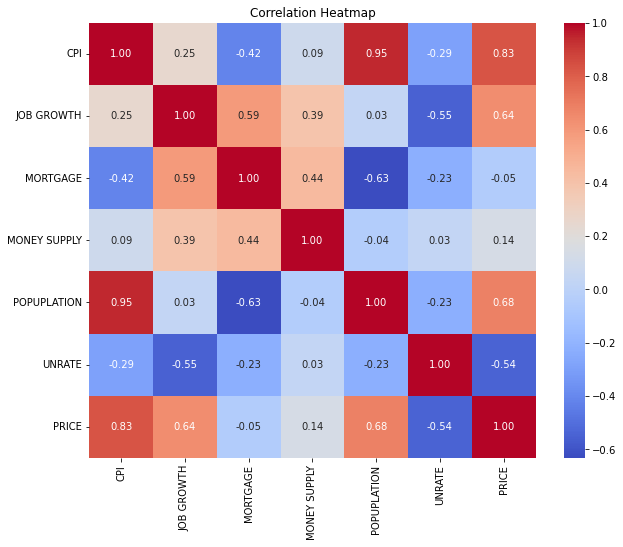

In [242]:
# Plot correlation heatmap
correlation_matrix = merged_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Interpreting the Heatmap:
A correlation coefficient ranges between -1 to 1, where:
1 indicates a perfect positive correlation (as one variable increases, the other also increases proportionally).
-1 indicates a perfect negative correlation (as one variable increases, the other decreases proportionally).
0 indicates no correlation.
Interpretations from the Heatmap:
    
#Strong positive correlation:

CPI and POPULATION have a strong positive correlation of 0.95. This suggests that as one variable increases, the other tends to increase almost in lockstep.

CPI and PRICE also show a relatively strong positive correlation of 0.83.

#Moderate positive correlation:

PRICE and POPULATION exhibit a moderate positive correlation of 0.68.

JOB GROWTH and PRICE have a moderate positive correlation of 0.64.

MORTGAGE and JOB GROWTH have a moderate positive correlation of 0.59.

#Weak positive correlation:

UNRATE and CPI show a weak positive correlation of 0.39.

JOB GROTH and PRICE show a weak positive correlation of 0.25

#Weak negative correlation:

MORTGAGE and POPULATION have a weak negative correlation of -0.63.

UNRATE and JOB GROWTH have a weak negative correlation of -0.55.


UNRATE and PRICE have a weak negative correlation of -0.54.

CPI and MORTGAGE have a weak negative correlation of -0.42.

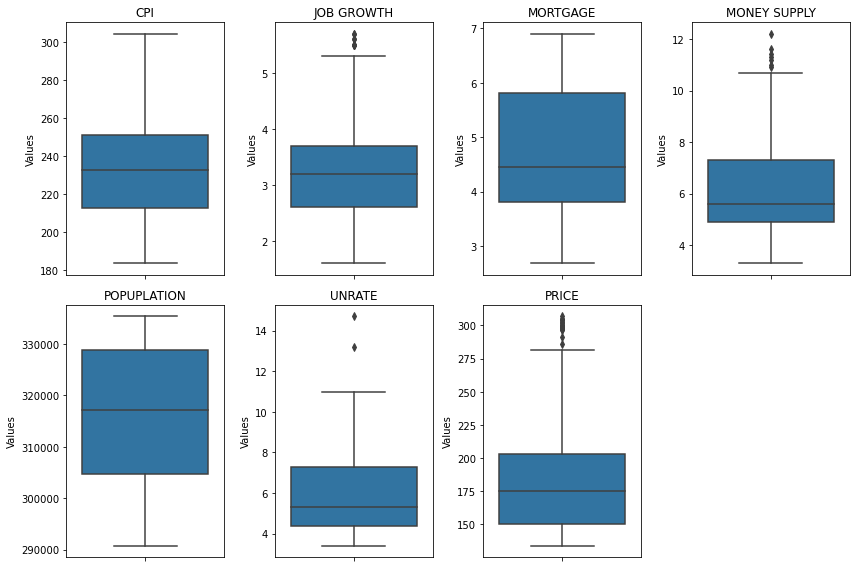

In [243]:
# Boxplots for numerical columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns) // 2 + 1, i)
    sns.boxplot(data=merged_data, y=column)
    plt.title(column)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()


In [245]:

# Log transformation for 'MONEY SUPPLY' 'UNRATE' 'PRICE' 'JOB GROWTH'

merged_data['MONEY SUPPLY'] = np.log1p(merged_data['MONEY SUPPLY'])
merged_data['UNRATE'] = np.log1p(merged_data['UNRATE'])
merged_data['PRICE'] = np.log1p(merged_data['PRICE'])
merged_data['JOB GROWTH'] = np.log1p(merged_data['JOB GROWTH'])


# LINEAR REGRESSION MODEL

In [247]:

# Prepare features and target variable
features = merged_data[[ 'CPI', 'JOB GROWTH', 'MORTGAGE', 'MONEY SUPPLY', 'POPUPLATION', 'UNRATE', 'PRICE']]
target = merged_data['PRICE'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.330359510831458e-30
R-squared: 1.0


# DECISION TREE MODEL

In [248]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree model
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - Mean Squared Error: {mse_dt}")
print(f"Decision Tree - R-squared: {r2_dt}")


Decision Tree - Mean Squared Error: 5.54663239594756e-06
Decision Tree - R-squared: 0.9959478616309834


# RANDOM FOREST MODEL

In [249]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model
random_forest = RandomForestRegressor(random_state=42)

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")


Random Forest - Mean Squared Error: 3.420853865093274e-07
Random Forest - R-squared: 0.9997500866794116


Linear Regression:
    
#Mean Squared Error (MSE): Super close to zero, almost perfect predictions.
#R-squared: A perfect score, understands the prices perfectly, might be too perfect for new problems.

Decision Tree:

#Mean Squared Error (MSE): Small errors, quite accurate but not as perfect as the first model.
#R-squared: Gets most things right, really good understanding but not flawless.

Random Forest:

#Mean Squared Error (MSE): Very tiny errors, incredibly close to perfection.
#R-squared: Almost perfect, nearly flawless understanding of prices.

In short, each model predicts house prices. The first is almost too perfect, the second is really good but not perfect, and the third is incredibly close to perfect in guessing prices. They each have strengths, but the last one seems to understand prices the best among them!








# THANKYOU!
RITUL PAWAR